# Logistic Regression for mortality prediction 
### We're going to try 3 models here - 
    LR 
    LR after balancing data
    LR after applying PCA

### Importing necessary libraries

In [224]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import os
sns.set()
# Access data.
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab import files

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
oversample = SMOTE()
scaler = StandardScaler()

### Load the dataset

In [226]:
uploaded = files.upload()

Saving rawdata.csv to rawdata (3).csv


In [0]:
import io
icudata = pd.read_csv(io.BytesIO(uploaded['rawdata.csv']))

In [228]:
icudata

,age,height,weight,eyes,motor,verbal,GCSTotal,temperature,respiratoryrate,heartrate,glucose,O2,fio2,ph,los,SBP,DBP,MAP,ethnicity,gender,hosp_alive,icu_alive
0,81.0,165.1,61.70,4.0,6.0,5.0,15.0,34.8,5.0,114.0,185.0,95.0,60.0,7.390,10.893056,103.366634,55.650501,71.555879,1.0,1,0,0
1,59.0,180.3,92.30,4.0,6.0,5.0,15.0,37.2,10.0,114.0,121.0,98.0,21.0,6.700,10.679861,132.334862,57.155963,82.215596,1.0,0,0,0
2,80.0,170.2,103.30,4.0,6.0,5.0,15.0,36.6,55.0,102.0,273.0,97.0,21.0,6.700,3.610417,112.200000,59.900000,77.333333,1.0,0,0,0
3,63.0,183.0,118.00,4.0,6.0,5.0,15.0,37.3,26.0,100.0,143.0,97.0,60.0,7.450,2.949306,128.652968,60.463470,83.193303,1.0,0,0,0
4,60.0,165.1,79.90,4.0,6.0,4.0,14.0,34.5,37.0,137.0,273.0,99.0,40.0,7.070,3.611806,117.556477,62.197927,80.650777,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17888,51.0,180.3,59.00,4.0,6.0,3.0,13.0,34.5,26.0,56.0,192.0,92.0,100.0,7.444,11.053472,130.552042,67.630504,88.604350,3.0,0,0,0
17889,51.0,170.2,63.05,1.0,1.0,1.0,3.0,34.5,33.0,86.0,273.0,88.0,100.0,7.404,2.611111,115.167622,61.166189,79.166667,0.0,1,1,1
17890,66.0,157.5,71.50,4.0,6.0,3.0,13.0,35.8,50.0,115.0,209.0,81.0,100.0,7.494,29.383333,122.685241,49.463950,73.871047,1.0,1,0,0
17891,50.0,165.1,59.00,1.0,5.0,1.0,7.0,34.9,14.0,62.0,182.0,97.0,100.0,7.185,2.145833,134.452465,77.519366,96.497066,3.0,1,0,0


### Dropping any null values

In [229]:
icudata = icudata.dropna()
icudata = icudata.drop('icu_alive',axis=1)
icudata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17764 entries, 0 to 17892
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              17764 non-null  float64
 1   height           17764 non-null  float64
 2   weight           17764 non-null  float64
 3   eyes             17764 non-null  float64
 4   motor            17764 non-null  float64
 5   verbal           17764 non-null  float64
 6   GCSTotal         17764 non-null  float64
 7   temperature      17764 non-null  float64
 8   respiratoryrate  17764 non-null  float64
 9   heartrate        17764 non-null  float64
 10  glucose          17764 non-null  float64
 11  O2               17764 non-null  float64
 12  fio2             17764 non-null  float64
 13  ph               17764 non-null  float64
 14  los              17764 non-null  float64
 15  SBP              17764 non-null  float64
 16  DBP              17764 non-null  float64
 17  MAP         

## Splitting data into training and testing dataset

In [0]:
feature_cols = ['age','height','weight','eyes','motor','verbal','GCSTotal','temperature','respiratoryrate','heartrate','glucose','O2','fio2','ph','los','SBP','DBP','MAP','ethnicity','gender']
x = icudata[feature_cols]
y = icudata.hosp_alive
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,    #splitting 
                                                    test_size=0.25, 
                                                    random_state=0)


## Scaling features using mean ant standard deviation

In [0]:
mu = x_train.mean()
std = x_train.std()    #
x_train = (x_train - mu)/std
x_test = (x_test - mu)/std

## Applying LR model

In [0]:
lrmodel = LogisticRegression(max_iter=1000)

# Start the model fitting process
lrmodel.fit(x_train, y_train)

# Run inference on trained model
predictions = lrmodel.predict(x_test)
lrprob = lrmodel.predict_proba(x_test)

### Keeping postivive outcomes of probability (i.e. expired patients)

In [0]:
lrprob = lrprob[:,1]

## Classification report

In [234]:
# Get model accuracy
acc = lrmodel.score(x_test, y_test)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.86      0.98      0.91      3730
           1       0.57      0.16      0.25       711

    accuracy                           0.85      4441
   macro avg       0.72      0.57      0.58      4441
weighted avg       0.81      0.85      0.81      4441



In [0]:
p = metrics.precision_score(y_test,predictions)
r = metrics.recall_score(y_test,predictions)
f1 = metrics.f1_score(y_test, predictions)

In [0]:
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test, lrprob)
auc = metrics.roc_auc_score(y_test, lrprob)

In [237]:
print('*'*30)
print(f'Logistic Regression results: \n')
print(f'\t Acc = {acc:.3f} \n\t Precision={p:.3f} \n\t Recall={r:.3f} \n\t F1={f1:.3f} \n\t AUC={auc:.3f} \n\t')

******************************
Logistic Regression results: 

	 Acc = 0.846 
	 Precision=0.571 
	 Recall=0.158 
	 F1=0.247 
	 AUC=0.770 
	


In [0]:
precision, recall, _ = metrics.precision_recall_curve(y_test, lrprob)

## Confusion Matrix 

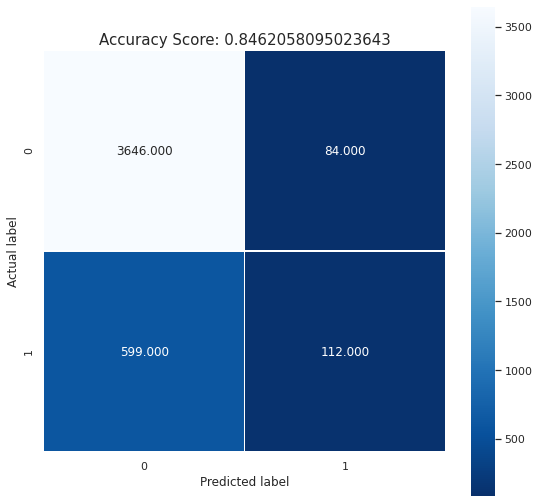

In [239]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

## ROC graph

Text(0.5, 1.0, 'ROC Curve, AUC = 0.770')

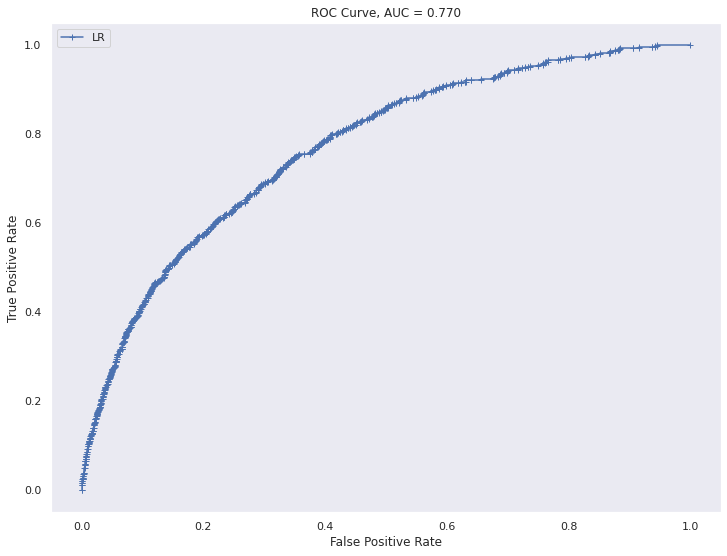

In [240]:
plt.figure(figsize=(12,9))
plt.plot(lr_fpr, lr_tpr, marker='+', label='LR')
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title(f'ROC Curve, AUC = {auc:.3f}')

## Precision-Recall curve

Text(0.5, 1.0, 'Precision-Recall curve')

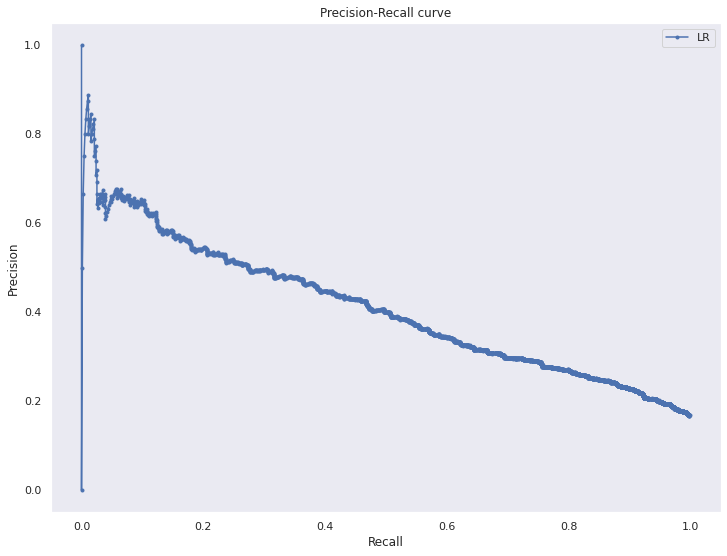

In [241]:
plt.figure(figsize=(12,9))
plt.plot(recall, precision, marker='.', label='LR')
plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')

## Cross Evaluation of this model 

Model Evaluation - LR
 LR - Accuracy result 0.8406322977917405 +/- 0.006653380242216805
 LR - ROC_AUC result 0.7668147518550613 +/- 0.004357477622330476
 LR - Precision result 0.5854960945263772 +/- 0.031297432030945024
 LR - Recall result 0.15423769381773514 +/- 0.010014258632713303


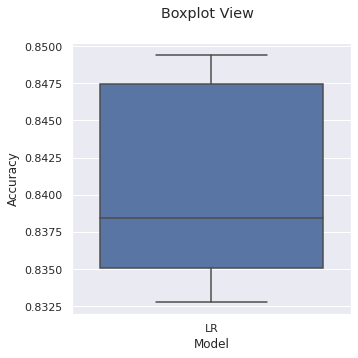

In [242]:
x = scaler.fit_transform(x)
# prepare models
models = []
models.append(('LR', lrmodel))
print('Model Evaluation - LR')
# evaluate each model in turn
results = []
names = []

for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=7,shuffle=True)
	cv_results = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
	cv_results2 = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='roc_auc')
	cv_results3 = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='precision')
	cv_results4 = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='recall')
	results.append(cv_results)
	names.append(name)
	print(f' {name} - Accuracy result {cv_results.mean()} +/- {cv_results.std()}')
	print(f' {name} - ROC_AUC result {cv_results2.mean()} +/- {cv_results2.std()}')
	print(f' {name} - Precision result {cv_results3.mean()} +/- {cv_results3.std()}')
	print(f' {name} - Recall result {cv_results4.mean()} +/- {cv_results4.std()}')

fig = plt.figure(figsize=(5,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

## Balancing dataset using SMOTE

In [243]:
x,y = oversample.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,    #splitting 
                                                    test_size=0.25, 
                                                    random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


##Scaling features

In [0]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Applying LR model to balanced dataset

In [0]:
lrmodel1 = LogisticRegression()

# Start the model fitting process
lrmodel1.fit(x_train, y_train)

# Run inference on trained model
predictions1 = lrmodel1.predict(x_test)
lrprob1 = lrmodel1.predict_proba(x_test)

In [0]:
lrprob1 = lrprob1[:,1]

## Classification report

In [247]:
# Get model accuracy
acc = lrmodel1.score(x_test, y_test)
print(classification_report(y_test,predictions1))


              precision    recall  f1-score   support

           0       0.70      0.72      0.71      3706
           1       0.71      0.70      0.70      3693

    accuracy                           0.71      7399
   macro avg       0.71      0.71      0.71      7399
weighted avg       0.71      0.71      0.71      7399



In [0]:
p = metrics.precision_score(y_test,predictions1)
r = metrics.recall_score(y_test,predictions1)
f1 = metrics.f1_score(y_test, predictions1)

In [0]:
lr1_fpr, lr1_tpr, thresholds = metrics.roc_curve(y_test, lrprob1)
auc1 = metrics.roc_auc_score(y_test, lrprob1)

In [250]:
print('*'*30)
print(f'Logistic Regression results after oversampling: \n')
print(f'\t Acc = {acc:.3f} \n\t Precision={p:.3f} \n\t Recall={r:.3f} \n\t F1={f1:.3f} \n\t AUC={auc1:.3f} \n\t')

******************************
Logistic Regression results after oversampling: 

	 Acc = 0.705 
	 Precision=0.709 
	 Recall=0.695 
	 F1=0.702 
	 AUC=0.780 
	


In [0]:
precision1, recall1, _ = metrics.precision_recall_curve(y_test, lrprob1)

## Confusion Matrix

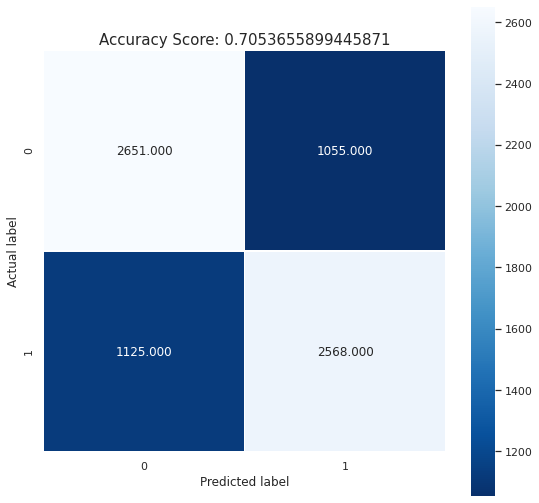

In [252]:
cm1 = metrics.confusion_matrix(y_test, predictions1)
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

## ROC Curve

Text(0.5, 1.0, 'ROC Curve, AUC = 0.780')

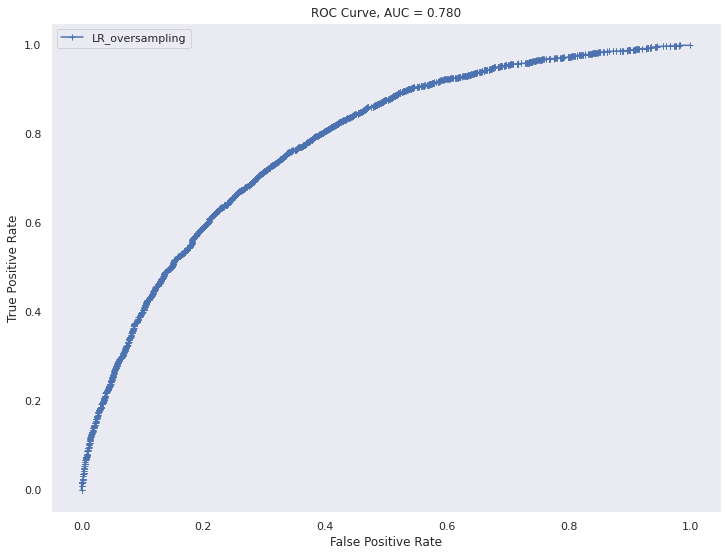

In [253]:
plt.figure(figsize=(12,9))
plt.plot(lr1_fpr, lr1_tpr, marker='+', label='LR_oversampling')
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title(f'ROC Curve, AUC = {auc1:.3f}')

## Precision - Recall curve

Text(0.5, 1.0, 'Precision-Recall curve')

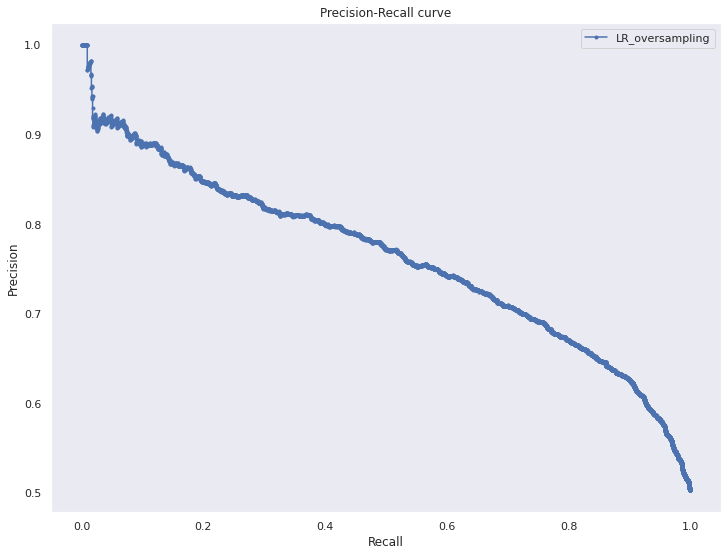

In [254]:
plt.figure(figsize=(12,9))
plt.plot(recall1, precision1, marker='.', label='LR_oversampling')
plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')

## Cross evaluation of this model

Model Evaluation - LR after balancing 
 LR after SMOTE - Accuracy result 0.7048590658575453 +/- 0.0053210908801996715
 LR after SMOTE - ROC_AUC result 0.7775451966127153 +/- 0.004362579707476622
 LR after SMOTE - Precision result 0.7095157118641142 +/- 0.009381441145113401
 LR after SMOTE - Recall result 0.694167929618145 +/- 0.015803056578718194


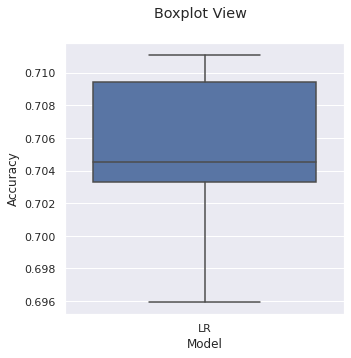

In [255]:
x = scaler.fit_transform(x)
# prepare models
models1 = []
models1.append(('LR after SMOTE', lrmodel1))
print('Model Evaluation - LR after balancing ')
# evaluate each model in turn
results1 = []
names1 = []

for name, model in models1:
	kfold = model_selection.KFold(n_splits=5,random_state=7,shuffle=True)
	cv_results = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
	cv_results2 = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='roc_auc')
	cv_results3 = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='precision')
	cv_results4 = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='recall')
	results1.append(cv_results)
	names1.append(name)
	print(f' {name} - Accuracy result {cv_results.mean()} +/- {cv_results.std()}')
	print(f' {name} - ROC_AUC result {cv_results2.mean()} +/- {cv_results2.std()}')
	print(f' {name} - Precision result {cv_results3.mean()} +/- {cv_results3.std()}')
	print(f' {name} - Recall result {cv_results4.mean()} +/- {cv_results4.std()}')

fig = plt.figure(figsize=(5,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results1)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

## Dimensionality reduction using PCA 

In [256]:
x = icudata.drop('hosp_alive',axis=1)
y = icudata.hosp_alive
x,y = oversample.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,    #splitting 
                                                    test_size=0.25, 
                                                    random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Applying PCA to scaled features

In [0]:
from sklearn.decomposition import PCA
pca = PCA(0.98)

In [259]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.98, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

## LR model on PCA features

In [261]:
pca_lr = LogisticRegression()
pca_lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pca_pred = pca_lr.predict(x_test)
pca_prob = pca_lr.predict_proba(x_test)

In [0]:
pca_prob = pca_prob[:,1]

## Classification report

In [264]:
acc_pca = pca_lr.score(x_test,y_test)
print(classification_report(y_test,pca_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      3706
           1       0.71      0.70      0.70      3693

    accuracy                           0.71      7399
   macro avg       0.71      0.71      0.71      7399
weighted avg       0.71      0.71      0.71      7399



In [0]:
p = metrics.precision_score(y_test, pca_pred)
r = metrics.recall_score(y_test, pca_pred)
f1 = metrics.f1_score(y_test, pca_pred)

In [0]:
pca_fpr, pca_tpr, thresholds = metrics.roc_curve(y_test,pca_prob)
pca_auc= metrics.roc_auc_score(y_test,pca_prob)

In [267]:
print('*'*30)
print(f'Logistic Regression after PCA results: \n')
print(f'\t Acc = {acc_pca:.3f} \n\t Precision={p:.3f} \n\t Recall={r:.3f} \n\t F1={f1:.3f} \n\t AUC={pca_auc:.3f} \n\t')

******************************
Logistic Regression after PCA results: 

	 Acc = 0.708 
	 Precision=0.711 
	 Recall=0.699 
	 F1=0.705 
	 AUC=0.780 
	


In [0]:
precision2, recall2, _ = metrics.precision_recall_curve(y_test, pca_prob)

## Confusion Matrix

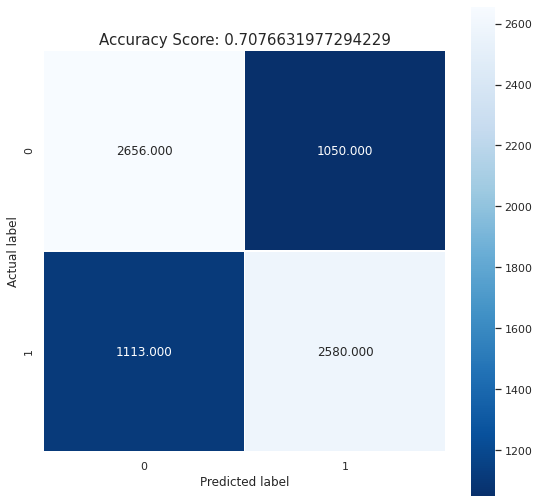

In [269]:
cm2 = metrics.confusion_matrix(y_test, pca_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_pca)
plt.title(all_sample_title, size = 15);

## ROC Curve

Text(0.5, 1.0, 'ROC Curve, AUC = 0.780')

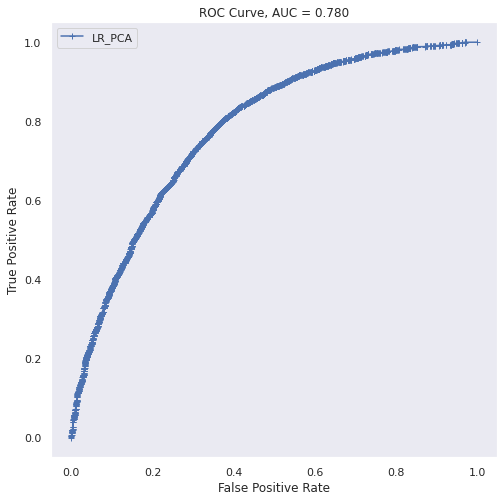

In [270]:
plt.figure(figsize=(8,8))
plt.plot(pca_fpr, pca_tpr, marker='+', label='LR_PCA')
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title(f'ROC Curve, AUC = {pca_auc:.3f}')

## Precision Recall curve

Text(0.5, 1.0, 'Precision-Recall curve')

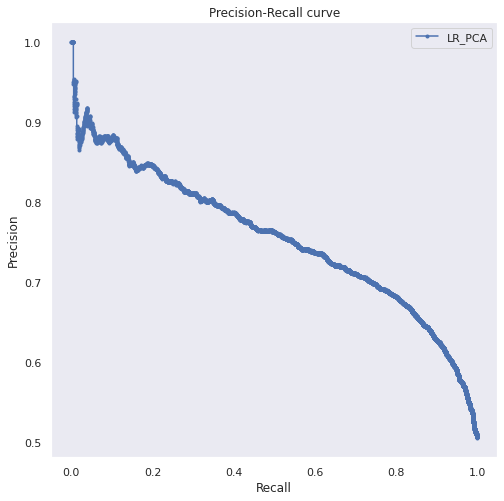

In [271]:
plt.figure(figsize=(8,8))
plt.plot(recall2, precision2, marker='.', label='LR_PCA')
plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')

## Cross evaluation of this model

Model Evaluation - LR with PCA
 LR - Accuracy result 0.7062441838696273 +/- 0.005646317345909146
 LR - ROC_AUC result 0.7790329448105784 +/- 0.006016658574780289
 LR - Precision result 0.7093867246506915 +/- 0.0123436814415421
 LR - Recall result 0.6988032531847443 +/- 0.0029131388513758


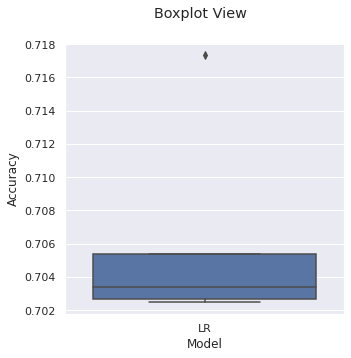

In [272]:
x = scaler.fit_transform(x)
x = pca.fit_transform(x)
# prepare models
models2 = []
models2.append(('LR with PCA', pca_lr))
print('Model Evaluation - LR with PCA')
# evaluate each model in turn
results2 = []
names2 = []

for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=7,shuffle=True)
	cv_results = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
	cv_results2 = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='roc_auc')
	cv_results3 = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='precision')
	cv_results4 = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='recall')
	results2.append(cv_results)
	names2.append(name)
	print(f' {name} - Accuracy result {cv_results.mean()} +/- {cv_results.std()}')
	print(f' {name} - ROC_AUC result {cv_results2.mean()} +/- {cv_results2.std()}')
	print(f' {name} - Precision result {cv_results3.mean()} +/- {cv_results3.std()}')
	print(f' {name} - Recall result {cv_results4.mean()} +/- {cv_results4.std()}')

fig = plt.figure(figsize=(5,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results2)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

## Visualization of comparison of the models applied

## Confusion matrix comparison

Text(1347.9305882352944, 0.5, 'Actual label')

<Figure size 2000x2000 with 0 Axes>

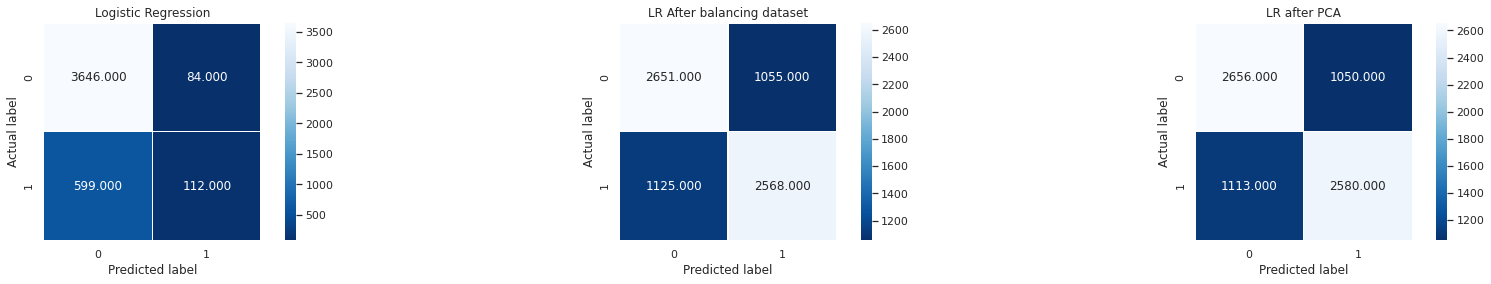

In [273]:
plt.figure(figsize=(20,20),dpi=100)
fig, (ax,ax2,ax3) = plt.subplots(ncols=3)
fig.subplots_adjust(right=3.9)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r',ax=ax);
ax.set_title('Logistic Regression')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r',ax=ax2);
ax2.set_title('LR After balancing dataset')
ax2.set_xlabel('Predicted label')
ax2.set_ylabel('Actual label')
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, 
            square = True, cmap = 'Blues_r',ax=ax3);
ax3.set_title('LR after PCA')
ax3.set_xlabel('Predicted label')
ax3.set_ylabel('Actual label')

## ROC Curve comparison

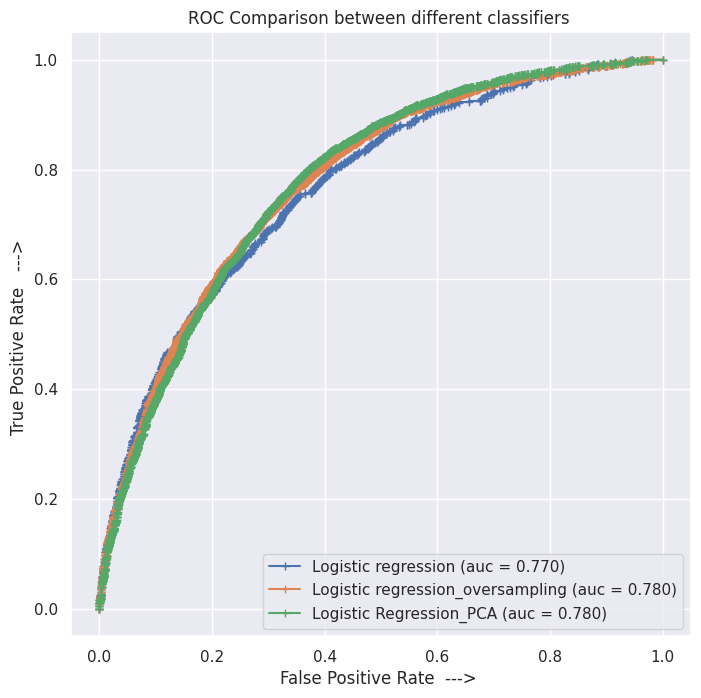

In [274]:
plt.figure(figsize=(8,8),dpi=100)
plt.plot(lr_fpr, lr_tpr, marker='+', label='Logistic regression (auc = %0.3f)' % auc)
plt.plot(lr1_fpr, lr1_tpr, marker='+', label='Logistic regression_oversampling (auc = %0.3f)' % auc1)
plt.plot(pca_fpr, pca_tpr, marker='+', label='Logistic Regression_PCA (auc = %0.3f)' % pca_auc)

plt.xlabel('False Positive Rate  ---> ')
plt.ylabel('True Positive Rate   ---> ')
plt.legend()
plt.title('ROC Comparison between different classifiers ')
plt.show()

## Precision Recall curve comparison

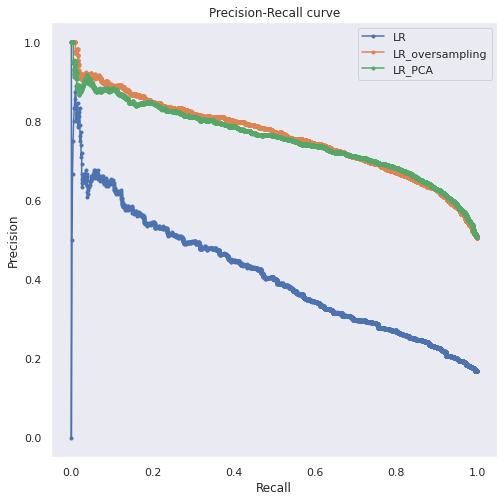

In [275]:
plt.figure(figsize=(8,8))
plt.plot(recall, precision, marker='.', label='LR')
plt.plot(recall1, precision1, marker='.', label='LR_oversampling')
plt.plot(recall2, precision2, marker='.', label='LR_PCA')

plt.grid()
plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f'Precision-Recall curve')
plt.show()